In [3]:
#Haven't used ChatGPT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/Online Retail data.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#1

print('total records: ' + str(len(df)))
print()

print(df.isnull().values.any())
df.dropna

df.describe()

total records: 12774

True


,Quantity,UnitPrice,CustomerID
count,12774.000000,12774.000000,9269.000000
mean,7.481055,3.941007,15605.259791
std,92.746435,17.045938,1739.959472
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14388.000000
50%,2.000000,2.510000,15658.000000
75%,6.000000,4.210000,17198.000000
max,2880.000000,940.870000,18239.000000


In [5]:
#1
top_by_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_by_quantity)

print()

df['TotalCost'] = df['Quantity'] * df['UnitPrice']
top_by_total = df.groupby('Description')['TotalCost'].sum().sort_values(ascending=False).head(10)
print(top_by_total)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     3417
ASSORTED COLOUR T-LIGHT HOLDER        1860
RED  HARMONICA IN BOX                 1695
ASSORTED INCENSE PACK                 1440
BLACK RECORD COVER FRAME              1142
WHITE HANGING HEART T-LIGHT HOLDER    1124
PACK OF 72 RETROSPOT CAKE CASES       1111
ASSORTED COLOUR BIRD ORNAMENT         1008
BROCADE RING PURSE                     982
HAND WARMER BIRD DESIGN                886
Name: Quantity, dtype: int64

Description
REGENCY CAKESTAND 3 TIER              9067.11
DOTCOM POSTAGE                        4743.35
BLACK RECORD COVER FRAME              3875.97
RED WOOLLY HOTTIE WHITE HEART.        3369.84
WHITE HANGING HEART T-LIGHT HOLDER    3196.94
PAPER CHAIN KIT 50'S CHRISTMAS        2926.62
CHILLI LIGHTS                         2824.57
SET 7 BABUSHKA NESTING BOXES          2039.94
HAND WARMER BIRD DESIGN               1903.60
RED  HARMONICA IN BOX                 1870.39
Name: TotalCost, dtype: float64


In [6]:
#2
top_by_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)
print(top_by_quantity)

print()

df['TotalCost'] = df['Quantity'] * df['UnitPrice']
top_by_total = df.groupby('Description')['TotalCost'].sum().sort_values(ascending=True).head(10)
print(top_by_total)

Description
ROTATING SILVER ANGELS T-LIGHT HLDR   -8645
CARD HOLDER GINGHAM HEART              -148
DOORMAT MERRY CHRISTMAS RED             -50
CARDHOLDER GINGHAM CHRISTMAS TREE       -50
ADVENT CALENDAR GINGHAM SACK            -43
?                                       -30
RED STAR CARD HOLDER                    -28
CHRISTMAS LIGHTS 10 SANTAS              -25
CHALKBOARD KITCHEN ORGANISER             -7
SILVER FISHING GNOME                     -2
Name: Quantity, dtype: int64

Description
DOORMAT MERRY CHRISTMAS RED         -337.50
CARD HOLDER GINGHAM HEART           -248.33
ADVENT CALENDAR GINGHAM SACK        -172.33
CHRISTMAS LIGHTS 10 SANTAS          -163.22
CARDHOLDER GINGHAM CHRISTMAS TREE   -127.50
CHALKBOARD KITCHEN ORGANISER        -124.58
RED STAR CARD HOLDER                 -57.48
Discount                             -56.79
CHEST 7 DRAWER MA CAMPAGNE           -18.95
SWEETHEART CARRY-ALL BASKET          -17.00
Name: TotalCost, dtype: float64


<Axes: xlabel='date'>

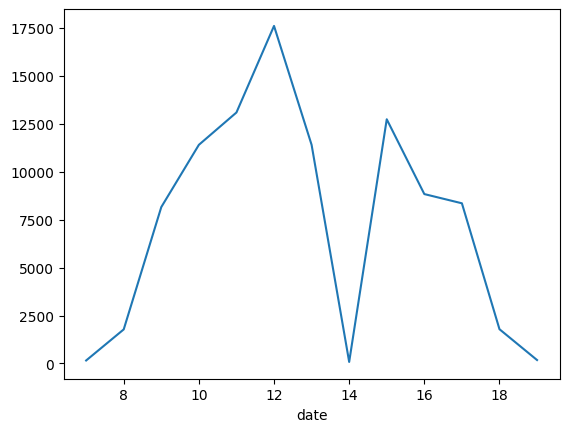

In [7]:
#3
df['date'] = pd.to_datetime(df['InvoiceDate']).dt.hour
sales = df.groupby('date')['Quantity'].sum()

df.head()
sns.lineplot(x=sales.index, y=sales.values)


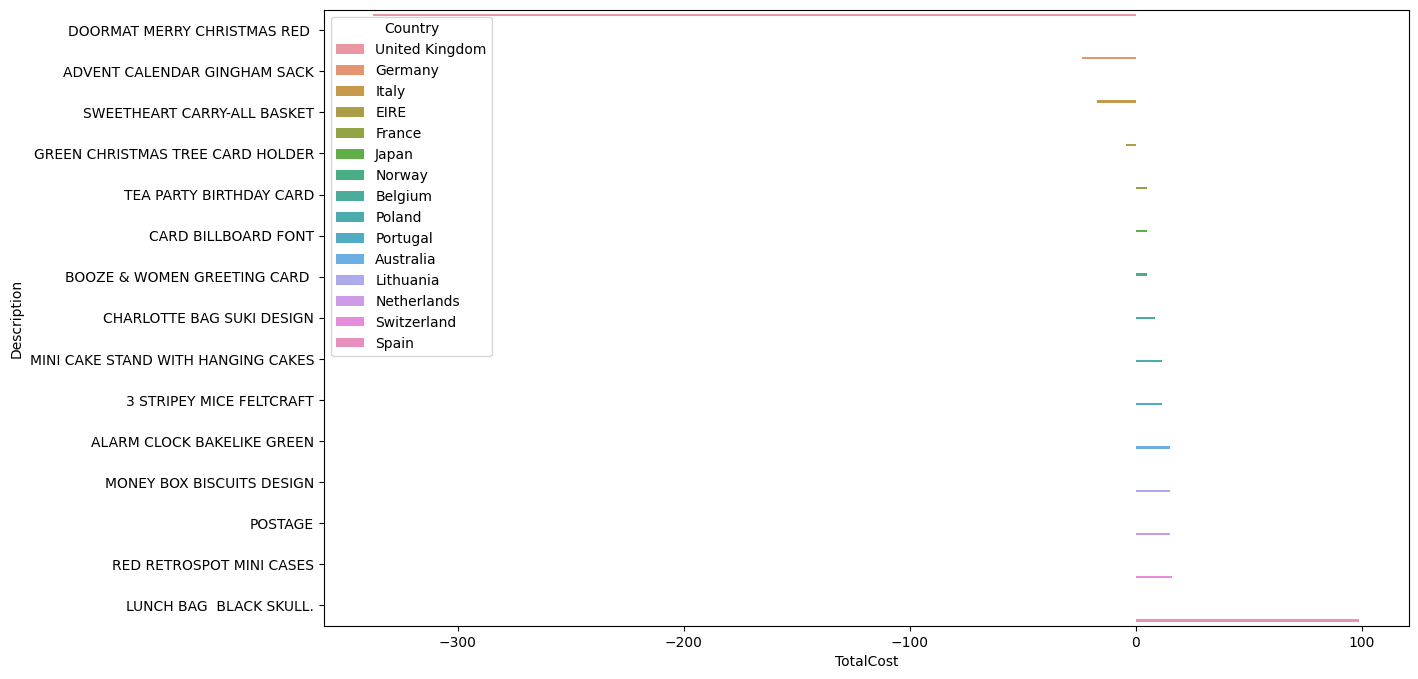

In [11]:
# The management may contemplate discontinuing the least-selling product in each country.
# Given that these least-selling products can vary across countries, we will generate a graph for each country to highlight the product with the lowest sales.


product_sales_by_country = df.groupby(['Country', 'Description'])['TotalCost'].sum().reset_index()
product_sales_by_country = product_sales_by_country.sort_values(by=['TotalCost', 'Country'])

bottom_products_by_country = product_sales_by_country.groupby('Country').head(1)


plt.figure(figsize=(14, 8))
sns.barplot(x='TotalCost', y='Description', hue='Country', data=bottom_products_by_country)


# plt.xticks(rotation=45)

plt.legend(title='Country')
plt.show()


In [9]:
for country in bottom_products_by_country['Country'].unique():
    print(f"\nBottom product in {country}:")
    bottom_products = bottom_products_by_country[bottom_products_by_country['Country'] == country]
    for index, row in bottom_products.iterrows():
        print(f"{row['Description']}: {row['TotalCost']}")


Bottom product in United Kingdom:
DOORMAT MERRY CHRISTMAS RED : -337.5

Bottom product in Germany:
ADVENT CALENDAR GINGHAM SACK: -23.8

Bottom product in Italy:
SWEETHEART CARRY-ALL BASKET: -17.0

Bottom product in EIRE:
GREEN CHRISTMAS TREE CARD HOLDER: -4.25

Bottom product in France:
TEA PARTY BIRTHDAY CARD: 5.04

Bottom product in Japan:
CARD BILLBOARD FONT: 5.04

Bottom product in Norway:
BOOZE & WOMEN GREETING CARD : 5.04

Bottom product in Belgium:
CHARLOTTE BAG SUKI DESIGN: 8.5

Bottom product in Poland:
MINI CAKE STAND WITH HANGING CAKES: 11.6

Bottom product in Portugal:
3 STRIPEY MICE FELTCRAFT: 11.7

Bottom product in Australia:
ALARM CLOCK BAKELIKE GREEN: 15.0

Bottom product in Lithuania:
MONEY BOX BISCUITS DESIGN: 15.0

Bottom product in Netherlands:
POSTAGE: 15.0

Bottom product in Switzerland:
RED RETROSPOT MINI CASES: 15.9

Bottom product in Spain:
LUNCH BAG  BLACK SKULL.: 99.0
